Adding gfdm library path

In [1]:
import sys
sys.path.insert(0, "ADD THE PATH OF THE FOLDER WITH THE PYTHON FILES HERE")

Import libraries

In [2]:
import numpy as np                   # numpy module

from matplotlib import pyplot as plt # Pyplot module
plt.rc('font', size=5)               # Change General Font Size

# gfdm libraries
from linearHeatConduction2d import Preprocessor  # Linear Heat Conduction Pre-Processor
from linearHeatConduction2d import Postprocessor # Linear Heat Conduction Post-Processor
from gfdm2d import Mesh # Mesh Object

Define simulation and material parameters

In [3]:
frequency           = 10 # frequency of the simulation [1/minute]
timeEnd             = 20 # End time of the simulation [minutes]
numThreads          = 8 # num of threads used to run the simulation
specHeatCapacity    = 385 # specific heat capacity of the material [J/(kg K)]
thermalConductivity = 400 # thermal conductivity of the material [W/m K]
massDensity         = 1 # mass density of the material [kg/m³]

Preprocessing

In [4]:
prepro  = Preprocessor("cpu_cooler") # initialise preprocessor

prepro.setFrequency(frequency)
prepro.setTimeEnd(timeEnd)
prepro.setNumThreads(numThreads)
prepro.setSpecHeatCapacity(specHeatCapacity)
prepro.setThermalConductivity(thermalConductivity*60) # per minute
prepro.setMassDensity(massDensity)

Import and link mesh

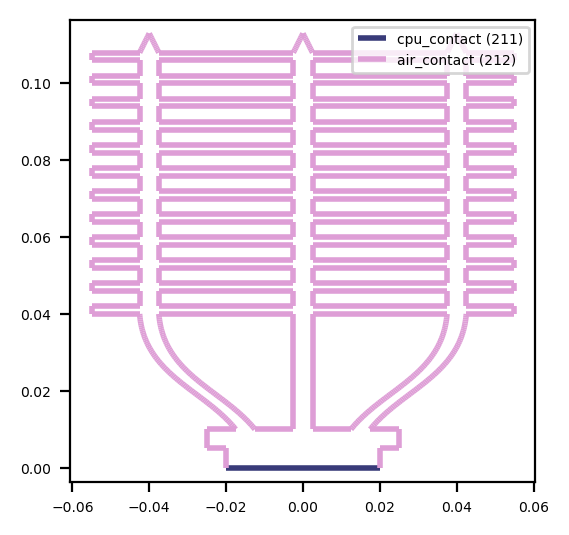

In [5]:
mesh = Mesh('cooler_mesh_24276.msh') # create mesh object
prepro.linkMesh(mesh)
fig, ax = plt.subplots()
fig.dpi = 200
fig.set_figheight(3)
fig.set_figwidth(3)
#mesh.plotMesh(ax, lw=0.3)
mesh.plotBoundary(ax, lw=2)
plt.legend()

Set boundary conditions

In [6]:
prepro.setBoundaryCondition(physicalTag=211, boundaryType="Neumann", temp=0, filmCoeff=0, heatflux=60000*60)
prepro.setBoundaryCondition(physicalTag=212, boundaryType="Neumann", temp=20, filmCoeff=25*60, heatflux=0)

Set initial confition

In [7]:
prepro.setInitialCondition(20)

Run solver

In [8]:
solverPath = "YOUR SOLVER PATH/linearHeatConduction2d_BiCGSTAB"
prepro.setSolver(solverPath)
prepro.runSolver()

Solver Running...
0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
100%
Time needed: 1.623506784439087 seconds


Postprocessing

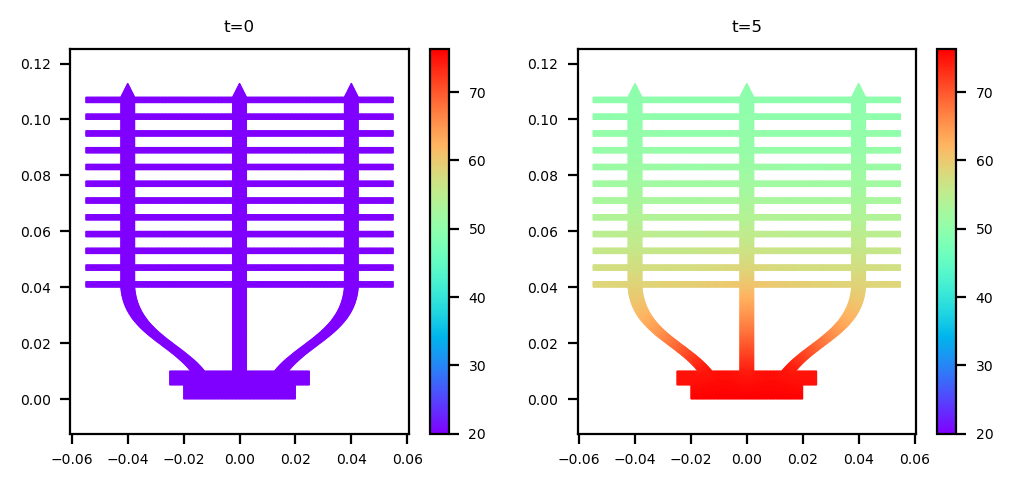

In [12]:
postpr = Postprocessor("cpu_cooler") # Initialise postprocessor
postpr.linkMesh(mesh) # link mesh

# plot results
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(6,2.5), dpi=200)
postpr.plotResults(fig,ax,[0,5])

In [10]:
# create animation of the simulation results
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(4,3), dpi=200)
postpr.triangulationPlotAnimated(fig,ax,"cpu_cooler_anim.mp4","jet")

Generate Animation...
